In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split


In [2]:
# reading csv file
athlete_events = pd.read_csv('../CSV for ML models/athlete_events.csv')

In [3]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
filter_data = athlete_events[["Sex", "Age", "Height", "Weight", "Team", "Year", "Season", "Sport", "Event", "Medal"]]

In [5]:
filter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
# get the data for winter Olympic
winter_data = filter_data[filter_data["Season"] == "Winter"]
winter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
4,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN
5,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,F,25.0,185.0,82.0,Netherlands,1992,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN
7,F,25.0,185.0,82.0,Netherlands,1992,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,F,27.0,185.0,82.0,Netherlands,1994,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
# get the data for summer Olympic
summer_data = filter_data[(filter_data["Season"] == "Summer")]
summer_data.head()



,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,F,18.0,168.0,NaN,Netherlands,1932,Summer,Athletics,Athletics Women's 100 metres,NaN


In [8]:
# print out every sport in the summer Olympic
summer_data["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [9]:
summer_sports = summer_data["Sport"].unique()

In [10]:
# For loop to train the Logistic Regression model and get the testing score for male athletes in every Summer Olympic Sport

for sport in summer_sports:
    try:
        athlete_m = summer_data[(summer_data["Sport"] == f'{sport}') & (summer_data["Sex"] == "M")]
        athlete_m = athlete_m[["Age", "Height", "Weight", "Medal"]]
        athlete_m = athlete_m.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        # One-hot encoding                
        athlete_m = athlete_m.replace("Gold", 1)
        athlete_m = athlete_m.replace("Silver", 1)
        athlete_m = athlete_m.replace("Bronze", 1)
        athlete_m["Medal"] = athlete_m["Medal"].fillna(0)
        athlete_m = athlete_m.dropna()
        athlete_m["Medal"].unique()
        
        # Assign X (data) and y (target)        
        X1 = athlete_m[['Height', "Weight", "Age"]] 
        print(X1.shape) 
        y1 = athlete_m['Medal'] 
        print(y1.shape)
        print(sport)

        # Split our data into training and testing
        X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)
        
        # Create a Logistic Regression Model
        classifier = LogisticRegression() 
        
        #Fit (train) or model using the training data
        classifier.fit(X1_train, y1_train)
        
        #Validate the model using the test data
        print(f"Training Data Score: {classifier.score(X1_train, y1_train)}") 
        print(f"Testing Data Score: {classifier.score(X1_test, y1_test)}")
        
        # Predict the testing data point
        predictions = classifier.predict(X1_test)

        pd.DataFrame({"Prediction": predictions, "Actual": y1_test})
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")

(2461, 3)
(2461,)
Basketball
Training Data Score: 0.7550135501355013
Testing Data Score: 0.737012987012987
----------------------------------------------------
(2369, 3)
(2369,)
Judo
Training Data Score: 0.8552927927927928
Testing Data Score: 0.8600337268128162
----------------------------------------------------
(3459, 3)
(3459,)
Football
Training Data Score: 0.776792598303778
Testing Data Score: 0.7641618497109827
----------------------------------------------------
(20, 3)
(20,)
Tug-Of-War
Training Data Score: 0.8666666666666667
Testing Data Score: 0.6
----------------------------------------------------
(21391, 3)
(21391,)
Athletics
Training Data Score: 0.8901701676743751
Testing Data Score: 0.8790201944652206
----------------------------------------------------
(10321, 3)
(10321,)
Swimming
Training Data Score: 0.8717054263565891
Testing Data Score: 0.8736923672994963
----------------------------------------------------
(702, 3)
(702,)
Badminton
Training Data Score: 0.8821292775665

In [11]:
# For loop to train the Logistic Regression model and get the testing score for female athletes in every Summer Olympic Sport

for sport in summer_sports:
    try:
        athlete_f = summer_data[(summer_data["Sport"] == f'{sport}') & (summer_data["Sex"] == "F")]
        athlete_f = athlete_f[["Age", "Height", "Weight", "Medal"]]
        athlete_f = athlete_f.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        # One-hot encoding        
        athlete_f = athlete_f.replace("Gold", 1)
        athlete_f = athlete_f.replace("Silver", 1)
        athlete_f = athlete_f.replace("Bronze", 1)
        athlete_f["Medal"] = athlete_f["Medal"].fillna(0)
        athlete_f = athlete_f.dropna()
        athlete_f["Medal"].unique()
        
        # Assign X (data) and y (target)
        X = athlete_f[['Height', "Weight", "Age"]] 
        print(X.shape) 
        y = athlete_f['Medal'] 
        print(y.shape)
        print(sport)

        # Split our data into training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
        # Create a Logistic Regression Model
        classifier = LogisticRegression() 
        classifier
        
        # Fit (train) or model using the training data
        classifier.fit(X_train, y_train)
        
        # Validate the model using the test data
        print(f"Training Data Score: {classifier.score(X_train, y_train)}") 
        print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
        
        # Predict the testing data point
        predictions = classifier.predict(X_test)

        pd.DataFrame({"Prediction": predictions, "Actual": y_test})
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")

(1207, 3)
(1207,)
Basketball
Training Data Score: 0.6740331491712708
Testing Data Score: 0.6920529801324503
----------------------------------------------------
(997, 3)
(997,)
Judo
Training Data Score: 0.8112449799196787
Testing Data Score: 0.812
----------------------------------------------------
(984, 3)
(984,)
Football
Training Data Score: 0.6869918699186992
Testing Data Score: 0.7235772357723578
----------------------------------------------------
(0, 3)
(0,)
Tug-Of-War
An exception occurred
----------------------------------------------------
(10983, 3)
(10983,)
Athletics
Training Data Score: 0.8908583222046862
Testing Data Score: 0.8761835396941005
----------------------------------------------------
(8455, 3)
(8455,)
Swimming
Training Data Score: 0.8667402617883615
Testing Data Score: 0.847682119205298
----------------------------------------------------
(660, 3)
(660,)
Badminton
Training Data Score: 0.8868686868686869
Testing Data Score: 0.896969696969697
--------------------

In [12]:
# print out every sport in the winter Olympic
winter_data['Sport'].unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [13]:
winter_sports = winter_data['Sport'].unique()

In [14]:
# For loop to train the Logistic Regression model and get the testing score for male athletes in every Winter Olympic Sport
for sport in winter_sports:
    try:
        athlete_m = winter_data[(winter_data["Sport"] == f'{sport}') & (winter_data["Sex"] == "M")]
        athlete_m = athlete_m[["Age", "Height", "Weight", "Medal"]]
        athlete_m = athlete_m.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        # One-hot encoding
        athlete_m = athlete_m.replace("Gold", 1)
        athlete_m = athlete_m.replace("Silver", 1)
        athlete_m = athlete_m.replace("Bronze", 1)
        athlete_m["Medal"] = athlete_m["Medal"].fillna(0)
        athlete_m = athlete_m.dropna()
        athlete_m["Medal"].unique()
        
        # Assign X (data) and y (target)
        X = athlete_m[['Height', "Weight", "Age"]] 
        print(X.shape) 
        y = athlete_m['Medal'] 
        print(y.shape)
        print(sport)
        
        # Split our data into training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
        # Create a Logistic Regression Model
        classifier = LogisticRegression() 
        classifier
        
        # Fit (train) or model using the training data
        classifier.fit(X_train, y_train)
        
        # Validate the model using the test data
        print(f"Training Data Score: {classifier.score(X_train, y_train)}") 
        print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
        
        # Predict the testing data point
        #predictions = classifier.predict(X_test)

        #pd.DataFrame({"Prediction": predictions, "Actual": y_test})
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")

(2459, 3)
(2459,)
Speed Skating
Training Data Score: 0.8969631236442517
Testing Data Score: 0.8991869918699187
----------------------------------------------------
(4443, 3)
(4443,)
Cross Country Skiing
Training Data Score: 0.9171668667466987
Testing Data Score: 0.9144914491449145
----------------------------------------------------
(3807, 3)
(3807,)
Ice Hockey
Training Data Score: 0.7348511383537654
Testing Data Score: 0.7626050420168067
----------------------------------------------------
(2808, 3)
(2808,)
Biathlon
Training Data Score: 0.9121557454890789
Testing Data Score: 0.9202279202279202
----------------------------------------------------
(3718, 3)
(3718,)
Alpine Skiing
Training Data Score: 0.9526542324246772
Testing Data Score: 0.9548387096774194
----------------------------------------------------
(1026, 3)
(1026,)
Luge
Training Data Score: 0.8621586475942783
Testing Data Score: 0.8949416342412452
----------------------------------------------------
(2062, 3)
(2062,)
Bobsleig

In [15]:
# For loop to train the Logistic Regression model and get the testing score for female athletes in every Winter Olympic Sport
for sport in winter_sports:
    try:
        athlete_f = winter_data[(winter_data["Sport"] == f'{sport}') & (winter_data["Sex"] == "F")]
        athlete_f = athlete_f[["Age", "Height", "Weight", "Medal"]]
        athlete_f = athlete_f.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        # One-hot encoding
        athlete_f = athlete_f.replace("Gold", 1)
        athlete_f = athlete_f.replace("Silver", 1)
        athlete_f = athlete_f.replace("Bronze", 1)
        athlete_f["Medal"] = athlete_f["Medal"].fillna(0)
        athlete_f = athlete_f.dropna()
        athlete_f["Medal"].unique()
        
        # Assign X (data) and y (target)
        X = athlete_f[['Height', "Weight", "Age"]] 
        print(X.shape) 
        y = athlete_f['Medal'] 
        print(y.shape)
        print(sport)
        
        # Split our data into training and testing

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
        # Create a Logistic Regression Model
        classifier = LogisticRegression() 
        classifier
        
        # Fit (train) or model using the training data
        classifier.fit(X_train, y_train)
        
        # Validate the model using the test data
        print(f"Training Data Score: {classifier.score(X_train, y_train)}") 
        print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
        
        # Predict the testing data point

        #predictions = classifier.predict(X_test)

        #pd.DataFrame({"Prediction": predictions, "Actual": y_test})
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")

(1941, 3)
(1941,)
Speed Skating
Training Data Score: 0.8879725085910652
Testing Data Score: 0.8497942386831275
----------------------------------------------------
(3086, 3)
(3086,)
Cross Country Skiing
Training Data Score: 0.898876404494382
Testing Data Score: 0.8937823834196891
----------------------------------------------------
(754, 3)
(754,)
Ice Hockey
Training Data Score: 0.6584070796460177
Testing Data Score: 0.6137566137566137
----------------------------------------------------
(1807, 3)
(1807,)
Biathlon
Training Data Score: 0.922509225092251
Testing Data Score: 0.9070796460176991
----------------------------------------------------
(2604, 3)
(2604,)
Alpine Skiing
Training Data Score: 0.9272913466461854
Testing Data Score: 0.9416282642089093
----------------------------------------------------
(351, 3)
(351,)
Luge
Training Data Score: 0.9049429657794676
Testing Data Score: 0.7727272727272727
----------------------------------------------------
(143, 3)
(143,)
Bobsleigh
Traini

## Logistic Regression for male athletes in Gymnastics

In [16]:
Gymnastics_M = summer_data[(summer_data["Sport"] == "Gymnastics") & (summer_data["Sex"] == "M")]

In [17]:
Gymnastics_M = Gymnastics_M[["Age", "Height", "Weight", "Medal"]]
Gymnastics_M = Gymnastics_M.dropna(subset=['Height', 'Weight']).reset_index(drop = True)

In [18]:
Gymnastics_M = Gymnastics_M.replace("Gold", 1)
Gymnastics_M = Gymnastics_M.replace("Silver", 1)
Gymnastics_M = Gymnastics_M.replace("Bronze", 1)
Gymnastics_M["Medal"] = Gymnastics_M["Medal"].fillna(0)
Gymnastics_M = Gymnastics_M.dropna()

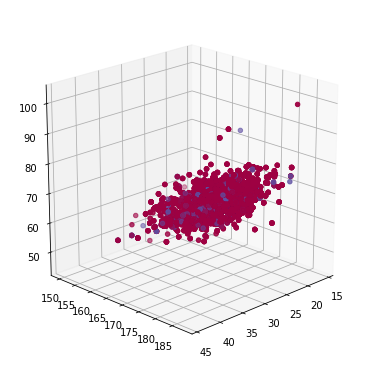

In [19]:
# Visualizing athlete with medal vs athlete without medal

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(Gymnastics_M['Age'], Gymnastics_M['Height'], Gymnastics_M['Weight'], c=Gymnastics_M['Medal'], cmap=plt.cm.get_cmap("Spectral"))
plt.show()

In [20]:
a = summer_data[(summer_data["Sport"] == "Gymnastics") & (summer_data["Sex"] == "M")]
a = a[["Age", "Height", "Weight", "Medal"]].dropna().reset_index(drop = True)


a = a.replace("Gold", 1)
a = a.replace("Silver", 2)
a = a.replace("Bronze", 3)

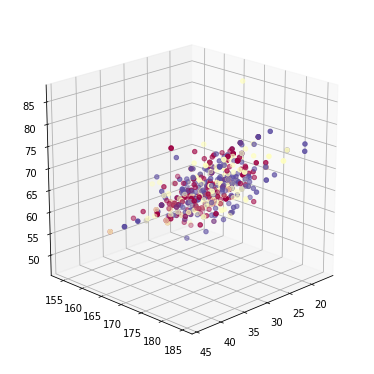

In [21]:
# Visualizing Gold, Silver, Bronze medalists data

fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(a['Age'], a['Height'], a['Weight'], c=a['Medal'], cmap=plt.cm.get_cmap("Spectral"))
plt.show()

In [22]:
Gymnastics_M["Medal"].unique()

array([1., 0.])

In [23]:
# Assign X (data) and y (target)

X = Gymnastics_M[['Height', "Weight", "Age"]] 
print(X.shape) 
y = Gymnastics_M['Medal'] 
print(y.shape)

(10696, 3)
(10696,)


In [24]:
# Split our data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Create a Logistic Regression Model
classifier = LogisticRegression() 
classifier

classifier.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Validate the model using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}") 
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")


Training Data Score: 0.9396659187235104
Testing Data Score: 0.9367988032909499


In [27]:
# Predict the testing data point

predictions = classifier.predict(X_test)

pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
3712,0.0,0.0
6778,0.0,0.0
304,0.0,0.0
3078,0.0,0.0
1597,0.0,0.0
...,...,...
4806,0.0,1.0
10662,0.0,0.0
3294,0.0,0.0
5131,0.0,0.0
